# Import different libraries

In this task we want to use [sklearn](https://scikit-learn.org/stable/user_guide.html) library for DBSCAN implementation.

In [7]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Data

We need to define the data here

In [28]:
# define the data as a 2d numpy array

data = np.array([[14, 1], [1, 8], [3, 12], [5, 1], [13, 11], [12, 6], [4, 12], [1, 8], [8, 3], [5, 1], [14, 12], [12, 9], [4, 5], [8, 4], [2, 3]])

# TODO: data should be a 2d array with the values provided in the assignment
assert data is not None, "You did not define the data yet!"


# Cluster

We need to call and run the DBSCAN here

In [23]:
# TODO define a clustering and fit it to the data
clustering = DBSCAN(eps=4, min_samples=3).fit(data)
assert clustering is not None, "You did not define the clustering yet!"

labels = clustering.labels_

In [24]:
labels

array([-1, -1, -1,  0,  1,  1, -1, -1,  0,  0,  1,  1,  0,  0,  0])

In [25]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 5


# Plot

use the following code to plot the clusters

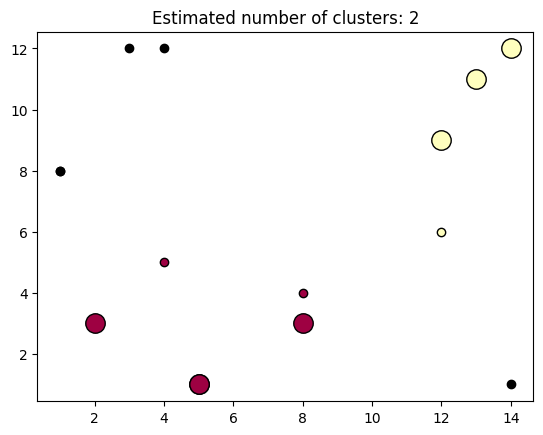

In [26]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.savefig('cluster.png')
plt.show()

In [ ]:
# distance matrix calculation
import pandas as pd
from scipy.spatial import distance_matrix

point_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
df = pd.DataFrame(data, columns = ['xcord', 'ycord'], index = point_names)
dist = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)

print(dist)